In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

# Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за **X** заработную плату (то есть, zp - признак),  
а за **y** - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = 10

Найдем коэфф. **b**

In [4]:
b = (n*sum(zp*ks) - sum(zp)*sum(ks)) / (n*sum(zp**2) - sum(zp)**2)
b

2.6205388824027653

Найдем коэфф. **a**

In [14]:
a = np.mean(ks) - b * np.mean(zp)
a

444.17735732435955

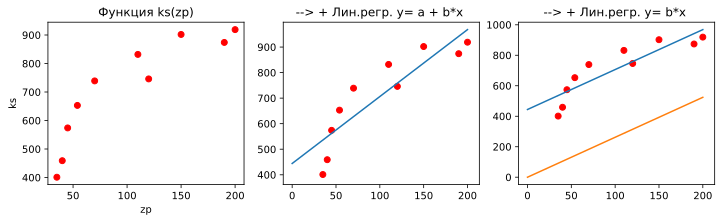

In [6]:
x = np.linspace(0, 200)

y1 = a + b*x
y2 = b*x

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
 
ax1.scatter(x=zp, y=ks, c='r')
ax1.set_title('Функция ks(zp)')
ax1.set_xlabel('zp')
ax1.set_ylabel('ks')
 
ax2.plot(x, y1)
ax2.scatter(x=zp, y=ks, c='r')
ax2.set_title('--> + Лин.регр. y= a + b*x ')

ax3.plot(x, y1)
ax3.plot(x, y2)
ax3.scatter(x=zp, y=ks, c='r')
ax3.set_title('--> + Лин.регр. y= b*x ')

plt.show()

Найдем коэффициенты **a** и **b** матричным методом

In [7]:
X = zp.reshape(10, 1)

X = np.hstack([np.ones((10,1)), X])

B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@ks)

print("a =", B[0], "\nb =", B[1])

a = 444.1773573243595 
b = 2.6205388824027693


# Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [8]:
def mse_(B1):
    return np.sum((B1*zp-ks)**2/len(zp))

In [9]:
alpha = 1e-5
B1 = 1

for i in range(121):
    B1 -= alpha*(2/len(zp))*np.sum((B1*zp-ks)*zp)
    if i%10==0:
        print("B1 =", B1, "  mse =", mse_(B1))

B1 = 2.347302   mse = 229405.42884192185
B1 = 5.748727835228332   mse = 56791.110810876475
B1 = 5.884200938409783   mse = 56517.29346111346
B1 = 5.889596605572516   mse = 56516.85910583005
B1 = 5.889811505973018   mse = 56516.85841681413
B1 = 5.8898200650966155   mse = 56516.858415721144
B1 = 5.889820405992196   mse = 56516.858415719405
B1 = 5.889820419569496   mse = 56516.85841571942
B1 = 5.889820420110257   mse = 56516.8584157194
B1 = 5.889820420131795   mse = 56516.858415719405
B1 = 5.8898204201326525   mse = 56516.85841571941
B1 = 5.889820420132687   mse = 56516.858415719405
B1 = 5.889820420132688   mse = 56516.85841571941


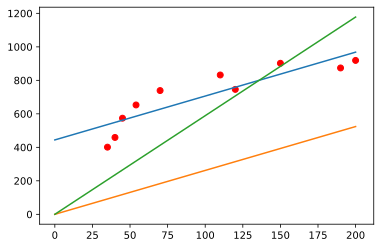

In [10]:
x = np.linspace(0, 200)

y1 = a + b*x
y2 = b*x
y3 = B1*x

fig, (ax3) = plt.subplots(1, 1)
 
ax3.plot(x, y1)
ax3.plot(x, y2)
ax3.plot(x, y3)
ax3.scatter(x=zp, y=ks, c='r')

plt.show()

# Задание 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Ответ: *Когда известна дисперсия генеральной совокупности - используем Z-таблицу, когда дисперсия не известна - используем таблицу Стьюдента.*

# Задание 4
Произвести вычисления как в пункте 2, но с вычислением **intercept**. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$$mse'_{\beta_0} = \frac{2}{n} ∑(\beta_0 + \beta_1X-y)$$      $$mse'_{\beta_1} = \frac{2}{n} ∑(\beta_0 + \beta_1X-y)X$$

In [11]:
def mse_b0_b1(B0, B1):
    return np.sum((B0+B1*zp-ks)**2/len(zp))

In [12]:
%%time

alpha_b0 = 1e-5
alpha_b1 = 1e-5

B0 = 440   # Начальные значения взяты с учетом предыдущих запусков вычислений,
B1 = 2     # чтобы сэкономить итоговое время вычисления

for i in range(4000000):
    B1 -= alpha_b1*(2/len(zp))*np.sum((B0+B1*zp-ks)*zp)
    B0 -= alpha_b0*(2/len(zp))*np.sum(B0+B1*zp-ks)

print("B0 =", B0, "  B1 =", B1, "  mse =", mse_b0_b1(B0, B1))

B0 = 444.177357318527   B1 = 2.620538882445696   mse = 6470.41420117666
Wall time: 2min 20s


In [13]:
print (B0 - a, B1 - b)

-5.832532679050928e-09 4.29305480054154e-11
